In [1]:
# imports

import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
aitia = App()

In [3]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.PRINCIPAL_FEATURE_ANALYSIS)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)
feature_selection_list.append(aitia.feature_selection.RECURSIVE_FEATURE_ELIMINATION)
feature_selection_list.append(aitia.feature_selection.XGBOOST)

In [4]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [5]:
pc = pycausal()
pc.start_vm()

In [6]:
hepar2_df = aitia.data.hepar2_100_data()

In [8]:
target_str_dot = aitia.data.hepar2_graph()

In [9]:
results, summary = aitia.run_analysis( hepar2_df,
                                       target_graph_str=target_str_dot,
                                       n_features=10,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

Running causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by PRINCIPAL_FEATURE_ANALYSIS
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by RANDOM_FOREST
Running causal discovery using PC
Running causal discovery using FCI
Running causal discovery using FGES-continuous
Running causal discovery using GFCI-continuous
Running causal discovery using RFCI-continuous
Completed causal discovery.
Running causal discovery on features selected by RECURSIVE_FEATURE_ELIMINATION
R

In [10]:
from IPython.display import display, HTML

display(HTML(summary.to_html()))

,causal algorithm,feature selection method,AUPR,SHD
0,PC,LINEAR_REGRESSION,0.044292,139.0
1,FCI,LINEAR_REGRESSION,0.044292,139.0
2,FGES-continuous,LINEAR_REGRESSION,0.516514,122.0
3,GFCI-continuous,LINEAR_REGRESSION,0.516514,122.0
4,RFCI-continuous,LINEAR_REGRESSION,0.044292,139.0
5,PC,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
6,FCI,PRINCIPAL_FEATURE_ANALYSIS,0.012551,124.0
7,FGES-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
8,GFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,125.0
9,RFCI-continuous,PRINCIPAL_FEATURE_ANALYSIS,0.012551,124.0


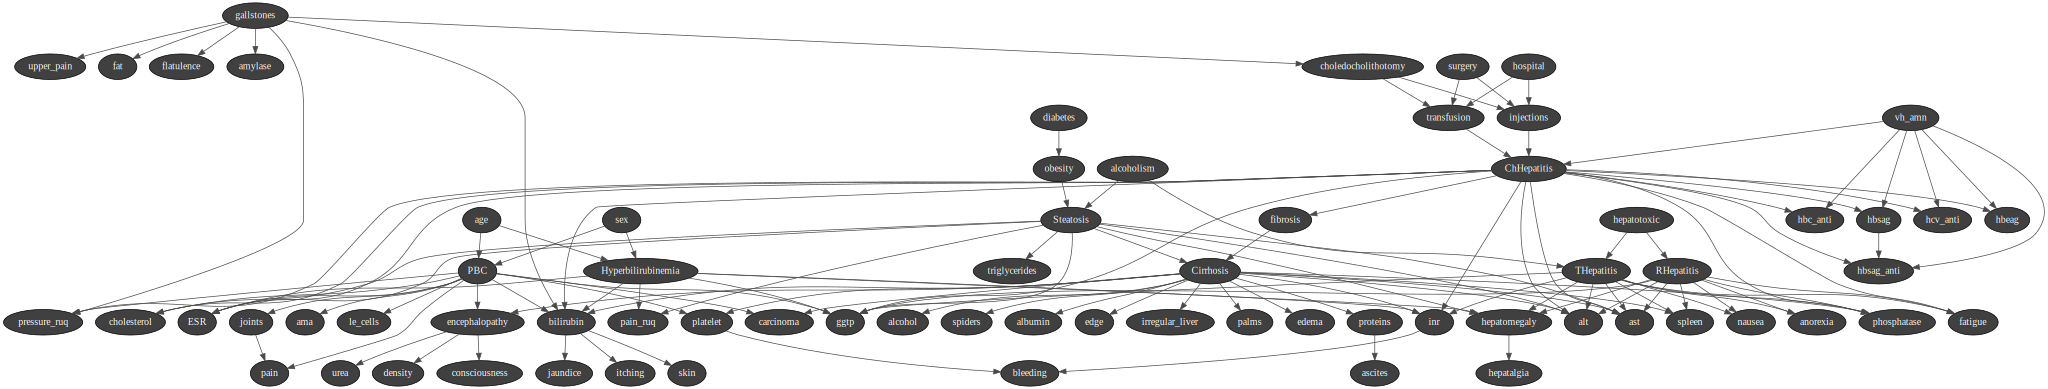

In [65]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn1 = gum.loadBN("/home/seamus/GitHub/aitiaexplorer/src/aitia_explorer/target_data/graphs/hepar2.bif")
gnb.showBN(bn1,size='30')

In [95]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
cmg = results[0].causal_graph

In [96]:
cmg.dag.edges()

OutEdgeView([('hcv_anti', 'upper_pain'), ('hcv_anti', 'hepatomegaly'), ('hcv_anti', 'surgery'), ('hcv_anti', 'palms'), ('hcv_anti', 'vh_amn'), ('hbeag', 'hcv_anti'), ('hbeag', 'upper_pain'), ('hbeag', 'hepatomegaly'), ('hbeag', 'surgery'), ('hbeag', 'palms'), ('hbeag', 'vh_amn'), ('fibrosis', 'hcv_anti'), ('fibrosis', 'hbeag'), ('Steatosis', 'hcv_anti'), ('Steatosis', 'hbeag'), ('Steatosis', 'hepatomegaly'), ('PBC', 'hcv_anti'), ('PBC', 'hbeag')])

In [97]:
bn2 = gum.BayesNet()

In [98]:
for node in cmg.dag.nodes():
    print(node)
    bn2.add(gum.LabelizedVariable(node, "", 2))

hcv_anti
upper_pain
hbeag
hepatomegaly
fibrosis
Steatosis
surgery
PBC
palms
vh_amn


In [99]:
for edge in cmg.dag.edges():
    bn2.addArc(edge[0], edge[1])

In [100]:
bn2

(gum::BayesNet<double>@0x5563d76a3f70) BN{nodes: 10, arcs: 18, domainSize: 1024, dim: 102}

In [75]:
gnb.sideBySide(bn1,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN'])

target,learned BN


In [77]:
features = results[0].feature_list

In [78]:
features.

['hcv_anti',
 'hbeag',
 'fibrosis',
 'PBC',
 'upper_pain',
 'hepatomegaly',
 'Steatosis',
 'palms',
 'surgery',
 'vh_amn']

In [80]:
df_reduced = hepar2_df[features]
df_reduced

,hcv_anti,hbeag,fibrosis,PBC,upper_pain,hepatomegaly,Steatosis,palms,surgery,vh_amn
0,0.0,0.0,-0.204124,-0.717741,-0.799590,0.623610,-0.274352,2.380476,-0.904534,-0.436436
1,0.0,0.0,-0.204124,1.393261,-0.799590,-1.603567,-0.274352,-0.420084,1.105542,-0.436436
2,0.0,0.0,-0.204124,1.393261,1.250641,-1.603567,-0.274352,-0.420084,1.105542,-0.436436
3,0.0,0.0,-0.204124,-0.717741,1.250641,0.623610,-0.274352,-0.420084,-0.904534,-0.436436
4,0.0,0.0,-0.204124,-0.717741,1.250641,-1.603567,-0.274352,-0.420084,-0.904534,2.291288
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,-0.204124,1.393261,1.250641,0.623610,-0.274352,-0.420084,-0.904534,-0.436436
96,0.0,0.0,-0.204124,-0.717741,-0.799590,-1.603567,-0.274352,-0.420084,-0.904534,-0.436436
97,0.0,0.0,-0.204124,1.393261,-0.799590,0.623610,-0.274352,-0.420084,-0.904534,2.291288
98,0.0,0.0,-0.204124,-0.717741,-0.799590,0.623610,-0.274352,-0.420084,1.105542,-0.436436


In [89]:
cvs_file = df_reduced.to_csv('./dump.csv')

In [90]:
learner=gum.BNLearner('/home/seamus/GitHub/aitiaexplorer/src/notebooks/experiments/dump.csv')

In [92]:
learner.useGreedyHillClimbing()
bn3=learner.learnBN()

In [103]:
gnb.sideBySide(bn2, bn3, captions=['Original model','Learned model'])

Original model,Learned model


In [114]:
hepar2_df.to_csv('dump1.csv')
learner2=gum.BNLearner('/home/seamus/GitHub/aitiaexplorer/src/notebooks/experiments/dump1.csv')
learner2.useGreedyHillClimbing()
bn4=learner2.learnBN()

In [115]:
gnb.sideBySide(bn3, bn4, captions=['BN3','Bn4'])

BN3,Bn4


In [119]:
import pyAgrum.lib.bn_vs_bn as gcm
cmp=gcm.GraphicalBNComparator(bn3, bn4)
gnb.sideBySide(bn3, bn4,
               gnb.getBNDiff(bn3, bn3),
               captions=['bn3','bn4','graphical diff','Scores','equivalent ?','distances'])

ValueError: The 2 BNs are not comparable! There are names not present in the 2 BNs : {'alcoholism', 'Cirrhosis', 'density', 'platelet', 'gallstones', 'albumin', 'consciousness', 'fat', 'obesity', 'triglycerides', 'ggtp', 'hbsag', 'ChHepatitis', 'injections', 'jaundice', 'choledocholithotomy', 'pain_ruq', 'hospital', 'cholesterol', 'carcinoma', 'alt', 'age', 'joints', 'Hyperbilirubinemia', 'ESR', 'RHepatitis', 'nausea', 'diabetes', 'ama', 'ascites', 'urea', 'encephalopathy', 'sex', 'pressure_ruq', 'proteins', 'le_cells', 'hbc_anti', 'irregular_liver', 'edge', 'hepatotoxic', 'pain', 'bleeding', 'itching', 'amylase', 'THepatitis', 'alcohol', 'hbsag_anti', 'transfusion', 'fatigue', 'anorexia', 'bilirubin', 'spleen', 'spiders', 'hepatalgia', 'ast', 'edema', 'flatulence', 'skin', 'phosphatase', 'inr'}